<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/Ayam%20Rendang/Modin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install modin[ray] # Install Modin dependencies and Ray for parallelization

In [2]:
import pandas as pd
import modin.pandas as mp
import time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
%%time
df_mp = mp.read_csv('/content/drive/MyDrive/2018.csv') # replace with your file path

(raylet) Spilled 8705 MiB, 27 objects, write throughput 77 MiB/s.


CPU times: user 2.33 s, sys: 2.07 s, total: 4.4 s
Wall time: 1min 14s


In [5]:
%%time
mean_mp = df_mp['OP_CARRIER_FL_NUM'].mean() # replace 'your_column' with your column name

CPU times: user 62.5 ms, sys: 9.41 ms, total: 71.9 ms
Wall time: 2.39 s


1. DATA EXPLORATION

In [41]:
import modin.pandas as mp

# Load a CSV file from Google Drive into a DataFrame
df = mp.read_csv('/content/drive/MyDrive/2018.csv') # replace 'your_file.csv' with your file path

In [7]:
%%time
# Using Modin
print(df.head())
print(df.info())
print(df.describe())

      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2018-01-01         UA               2429    EWR  DEN          1517   
1  2018-01-01         UA               2427    LAS  SFO          1115   
2  2018-01-01         UA               2426    SNA  DEN          1335   
3  2018-01-01         UA               2425    RSW  ORD          1546   
4  2018-01-01         UA               2424    ORD  ALB           630   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0    1512.0       -5.0      15.0      1527.0  ...             268.0   
1    1107.0       -8.0      11.0      1118.0  ...              99.0   
2    1330.0       -5.0      15.0      1345.0  ...             134.0   
3    1552.0        6.0      19.0      1611.0  ...             190.0   
4     650.0       20.0      13.0       703.0  ...             112.0   

   ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
0                250.0     225.0    1605.0            NaN 

2. DATA MANIPULATION

In [8]:
%%time
# Grouping data using Modin
grouped_df = df.groupby('OP_CARRIER_FL_NUM') # replace 'your_column' with your column name

CPU times: user 2.56 ms, sys: 0 ns, total: 2.56 ms
Wall time: 2.58 ms


3. DATA VISUALIZATION

In [9]:
print(type(df))

<class 'modin.pandas.dataframe.DataFrame'>


In [10]:
!pip install --upgrade modin

In [11]:
df_pd = df._to_pandas()

In [29]:
import modin.pandas as mp

# Load a CSV file from Google Drive into a DataFrame
df = mp.read_csv('/content/drive/MyDrive/2018.csv') # replace 'your_file.csv' with your file path

In [30]:
import pandas as pd

# Convert a small subset of the Modin DataFrame to a pandas DataFrame
df_pd = pd.DataFrame(df.head(1000))

# Now you can use df_pd for your visualizations


In [33]:
import matplotlib.pyplot as plt
import modin.pandas as pd

# Assuming df is a Modin DataFrame
df_pd = pd.DataFrame(df)

# Now you can use df_pd for visualization


the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


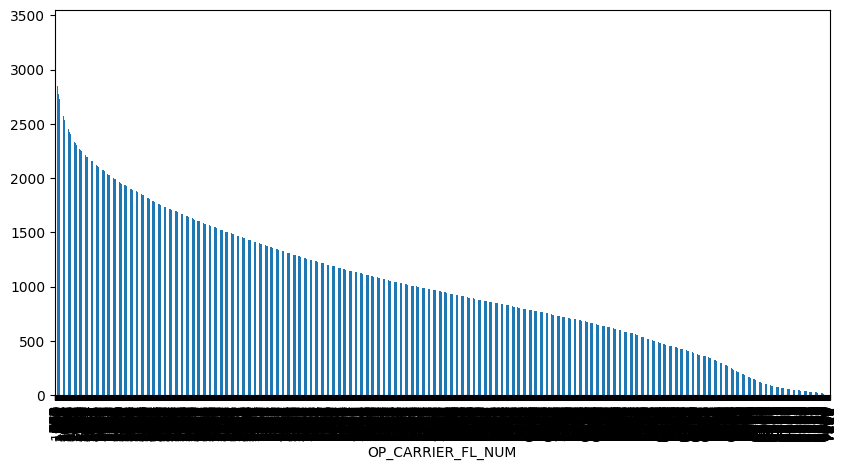

In [34]:
# Plotting
plt.figure(figsize=(10,5))
df_pd['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar') # replace 'your_column' with your column name
plt.show()


5. PERFORMANCE COMPARISON

In [35]:
def calculate_mean(df, OP_CARRIER_FL_NUM):
    return df[OP_CARRIER_FL_NUM].mean()

In [36]:
%%time
# Assuming df_pd is your pandas DataFrame
mean_pd = calculate_mean(df_pd, 'OP_CARRIER_FL_NUM') # replace 'your_column' with your column name

CPU times: user 47.8 ms, sys: 6.4 ms, total: 54.2 ms
Wall time: 2.14 s


In [38]:
%%time
# Assuming df is your Modin DataFrame
mean_modin = calculate_mean(df, 'OP_CARRIER_FL_NUM') # replace 'your_column' with your column name

CPU times: user 37 ms, sys: 7.28 ms, total: 44.3 ms
Wall time: 1.37 s
